---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 1

---

Please write your full name here
- **Name** : "Mohamed El-Sayed Eid"

- **Make sure to answer ALL questions**
- **Leave the output of the cells, don't remove it**

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
labels = dict(zip(np.unique(cancer.target), cancer.target_names))
# print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [ ]:
def answer_zero():
    """
    This function returns the number of features in the cancer data.

    Returns:
    num_features (int): The number of features in the cancer data.
    """
    num_features = cancer.data.shape[1]
    return num_features # Return your answer

In [ ]:
print(answer_zero())

30


### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [ ]:
def answer_one():
    """
    Creates a combined DataFrame from the cancer dataset features and target.

    Returns:
    df_combined (pd.DataFrame): Combined DataFrame of features and target
    """
    # Create DataFrame for features
    df_features = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

    # Create DataFrame for target
    df_target = pd.DataFrame(data=cancer.target, columns=["target"])

    # Concatenate feature and target DataFrames
    df_combined = pd.concat([df_features, df_target], axis=1)

    return df_combined

print(answer_one())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [ ]:
def answer_two():
    """
    This function calculates the class distribution of the target column in the cancerdf dataframe.

    Returns:
    class_distribution (pandas Series): The count of each unique value in the target column.
    """
    cancerdf = answer_one()  # Call the answer_one function to get the cancer dataframe
    class_distribution = cancerdf['target'].map(labels).value_counts() # Calculate the count of each unique value in the target column
    return class_distribution  # Return the class distribution


print(answer_two())

benign       357
malignant    212
Name: target, dtype: int64


### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [ ]:
def answer_three():
    """
    This function prepares the data for machine learning by retrieving the dataset, separating features and target, and returning them.
    """
    cancerdf = answer_one()  # Retrieve the dataset
    X = cancerdf.drop("target", axis=1)  # Features
    y = cancerdf["target"]  # Target
    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets. Use only 20% of the data for testing. Use a random state of 40

In [ ]:
from sklearn.model_selection import train_test_split

def answer_four():
    """
    Splits the data into training and testing sets using train_test_split.

    Returns:
    X_train: array-like
        Training input data
    X_test: array-like
        Testing input data
    y_train: array-like
        Training target data
    y_test: array-like
        Testing target data
    """
    X, y = answer_three()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = answer_four()
print(len(X_train))

455


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    """
    Trains a KNN model and returns the trained model.

    Returns:
    knn_model : trained KNN model
    """
    X_train, X_test, y_train, y_test = answer_four()

    # Create KNN model with 3 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)

    return knn_model

In [ ]:
print(answer_five())

KNeighborsClassifier(n_neighbors=3)


### Question 6
- Create an example that consists of the mean values for each feature in the X_train data.
- Using your knn classifier, predict the class label for this example.

In [ ]:
def answer_six():
    """
    Predicts the label using the KNN model trained on the training data.

    Returns:
    prediction (array): The predicted label
    """
    # Obtain the training data
    X_train, _, _, _ = answer_four()

    # Calculate the mean of the training data
    X_meanTrain = X_train.mean().values.reshape(1, -1)

    # Create a DataFrame of the mean values with feature names as columns
    X_mean = pd.DataFrame(data= X_meanTrain, columns=cancer.feature_names)

    # Obtain the KNN model
    knn_model = answer_five()

    # Make a prediction using the KNN model
    prediction = knn_model.predict(X_mean)

    return labels[prediction[0]]

In [ ]:
print(answer_six())

benign


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`. Return the predicted labels

In [ ]:
def answer_seven():
    """
    This function uses the result from answer_four to split the data into training and testing sets,
    and then uses the KNN model from answer_five to make predictions on the testing set.

    Returns:
    predicted_labels: array of predicted labels for the testing set
    """
    X_train, X_test, y_train, y_test = answer_four()  # Split data into training and testing sets
    knn = answer_five()  # Get KNN model

    # Make predictions on the testing set
    predicted_labels = knn.predict(X_test)

    # Map predicted labels to target names
    predicted_labels_mapped = np.array([labels[label] for label in predicted_labels])

    return predicted_labels_mapped

In [ ]:
print(answer_seven())

['benign' 'malignant' 'benign' 'benign' 'malignant' 'benign' 'malignant'
 'benign' 'malignant' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'malignant'
 'malignant' 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign' 'malignant'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'benign' 'benign' 'benign' 'malignant'
 'benign' 'malignant' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'malignant' 'malignant'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign' 'malignant'
 'benign' 'malignant' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign' 'malignant'
 'benign' 'benign

### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`.
- Is the training accuracy higher or lower that the testing accuracy?
- According to the test accuracy, would this model generalize well to new unseen inputs?

In [ ]:
def answer_eight():
    """
    Calculate the accuracy on the test and training sets using the KNN model.

    Returns:
    test_score (float): Accuracy on the test set
    train_score (float): Accuracy on the training set
    """
    X_train, X_test, y_train, y_test = answer_four()  # Load the training and test data
    knn = answer_five()  # Load the KNN model

    # Calculate accuracy on the test set
    test_score = knn.score(X_test, y_test)

    # Calculate accuracy on the training set
    train_score = knn.score(X_train, y_train)

    return test_score, train_score

In [ ]:
print(answer_eight())

(0.9298245614035088, 0.9560439560439561)


**Answer**

1. The training accuracy is higher than test accuracy, where:
$\text{train accuracy = 0.95604, and test accuracy = 0.92982}$

2. As the model performs slightly better on training data than test data `unseen data`, it might be overfitting and does not generalize well. However, the difference between the training and test accuracies is not that large, indicating that the model is not severely overfitting.

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [ ]:
def accuracy_plot():
    """
    Plots the training and test accuracies for malignant and benign cells.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    %matplotlib notebook
    %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()  # Split the data into training and test sets
    cancerdf = answer_one()  # Load the cancer dataset

    # Extract portions of the dataset for malignant and benign cells
    mal_train_X = X_train[y_train == 0]
    mal_train_y = y_train[y_train == 0]

    ben_train_X = X_train[y_train == 1]
    ben_train_y = y_train[y_train == 1]

    mal_test_X = X_test[y_test == 0]
    mal_test_y = y_test[y_test == 0]

    ben_test_X = X_test[y_test == 1]
    ben_test_y = y_test[y_test == 1]

    knn = answer_five()  # Load the KNN model

    scores = []

    # Calculate accuracy scores for each case
    scores.append(knn.score(mal_train_X, mal_train_y))
    scores.append(knn.score(ben_train_X, ben_train_y))
    scores.append(knn.score(mal_test_X, mal_test_y))
    scores.append(knn.score(ben_test_X, ben_test_y))

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0', '#55a868', '#4c72b0', '#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height * 0.90, '{0:.{1}f}'.format(height, 2),
                       ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0, 1, 2, 3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8)
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

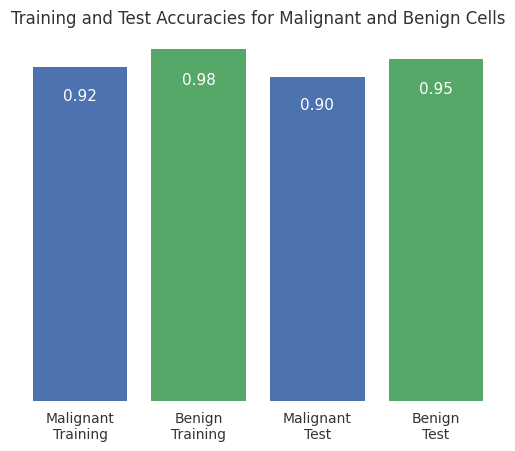

In [ ]:
accuracy_plot()

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing), use random_state 100
3. Create scatter plot matrix using the Seaborn library.
4. Choose two features only to train a knn model with suitable "k".
    - You must choose the best two features --> i.e. you need to experiment!!
    - You must choose the best K --> i.e. you need to experiment!!
5. Evaluate your model performance and comment on your results.
    - Print testing and training accuracies
    - Plot a confusion matrix for the model on the test data
    - **Questions to answer**:
        - Do you think the model did well?
        - Suggest one way to improve the model results

In [ ]:
########### CODE
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

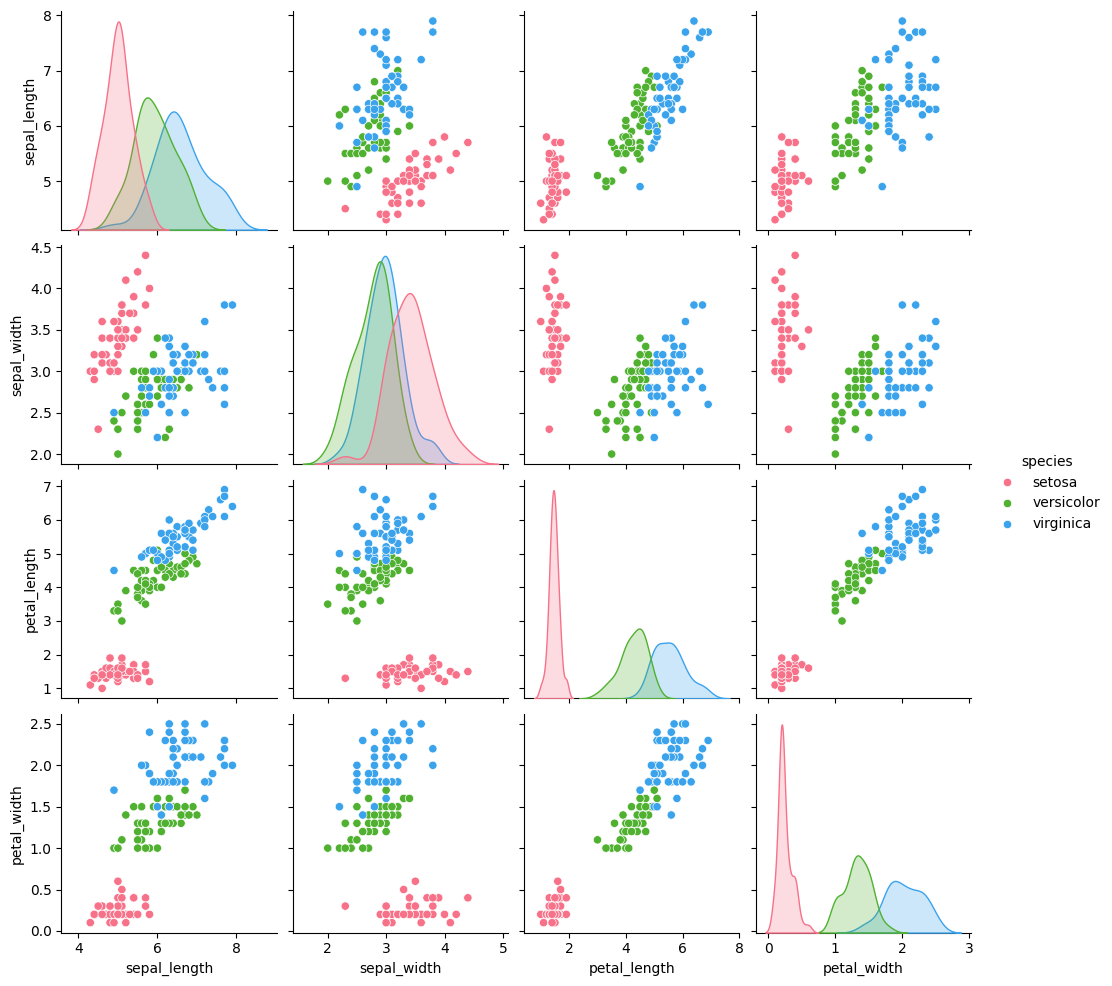

In [ ]:
# Load the iris dataset from seaborn
iris_df = sns.load_dataset("iris")

# Create a pairplot of the iris dataset, with different colors for each species
sns.pairplot(iris_df, hue="species", palette="husl")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),  # Values of k to try
    'weights': ['uniform', 'distance'],  # Weighting strategies
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

best_score = 0
best_params = {}
best_features = []


# Iterate over all combinations of features
for i in range(len(iris.feature_names)):
    for j in range(i + 1, len(iris.feature_names)):
        # Select the two features
        selected_features = [i, j]
        X_train_selected = X_train[:, selected_features]

        # Perform grid search
        grid_search.fit(X_train_selected, y_train)

        # Check if this combination improves the best score
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            best_features = selected_features

# Print the best score, parameters, and selected features
print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Features:", [iris.feature_names[i] for i in best_features])

Best Score: 0.9714285714285713
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best Features: ['petal length (cm)', 'petal width (cm)']


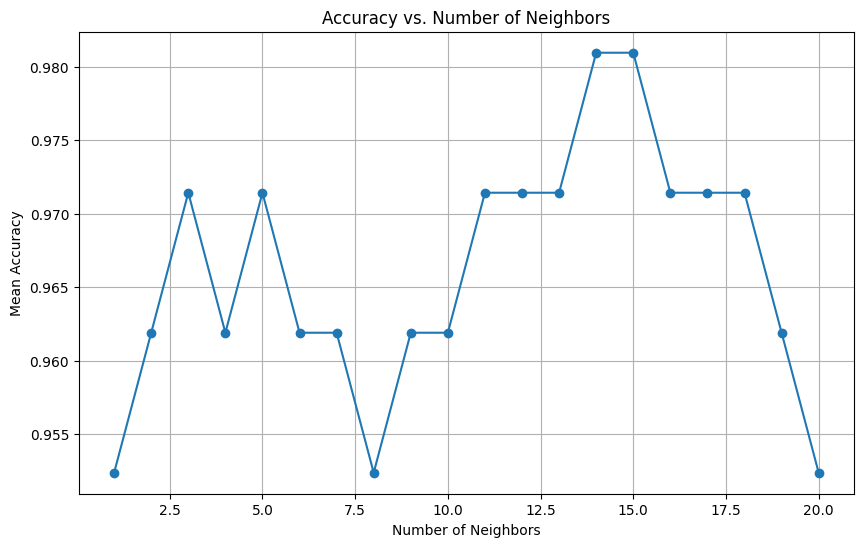

In [ ]:
def plot_accuracy(X_train, y_train, param_grid):
    # Initialize GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

    # Lists to store results
    n_neighbors_values = []
    mean_accuracy_values = []

    # Iterate over values of n_neighbors
    for n_neighbors in param_grid['n_neighbors']:
        # Update the parameter grid with the current n_neighbors value
        param_grid['n_neighbors'] = [n_neighbors]

        # Perform grid search
        grid_search.fit(X_train, y_train)

        # Store the results
        n_neighbors_values.append(n_neighbors)
        mean_accuracy_values.append(grid_search.best_score_)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors_values, mean_accuracy_values, marker='o')
    plt.title('Accuracy vs. Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.show()

# Call the method to plot accuracy
plot_accuracy(X_train, y_train, param_grid)

Training Accuracy: 0.9714285714285714
Testing Accuracy: 0.9555555555555556


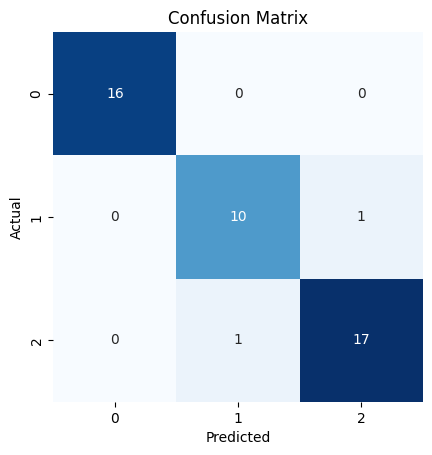

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select the best features and k value found during the grid search
best_features = [2, 3]  # Example of the best features found
best_k = 3  # Example of the best k value found

# Train a k-NN classifier using the best features and k value
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
X_train_selected = X_train[:, best_features]
X_test_selected = X_test[:, best_features]
knn_classifier.fit(X_train_selected, y_train)

# Evaluate the model on training and testing sets
train_accuracy = knn_classifier.score(X_train_selected, y_train)
test_accuracy = knn_classifier.score(X_test_selected, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot confusion matrix for the model on the test data
y_pred = knn_classifier.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Answer**

1. The model overall performs well. as the difference between score of train and test is very small suggesting the model generializes well.
2. by scaling the features we can increase the accuracy of the model, as KNN is a distance based algorithm.